# Classificador de acórdãos a partir da jurisprudência do TCE/PI com ULMFiT
Usando tcepi_decisoes_ate_10_2020.csv, que contém dados de boletins até outubro de 2020 somente para o classificador. Para ajuste fino do modelo, foi utilizado tce_ementas_de_decisoes.csv, que contem as ementas extraidas dos acórdãos e pareceres previos.

### Configuração
- **Architecture 4 QRNN with 1550 hidden parameters by layer, SentencePiece tokenizer (15 000 tokens)**
- **Hyperparameters and training method from the MultiFiT paper**

### Versões das bibliotecas utilizadas:
- fastai - 1.0.61
- Pytorch - 1.4.0
- Sentencepiece - 0.1.91

## Introdução
Os modelos foram treinados utilizando o método ULMFiT, através do framework [fastai](https://docs.fast.ai/) (Deep Learning library on PyTorch) na versão 1.0.61.<br>
As fases da ULMFiT:<br>
<img src="https://drive.google.com/uc?id=1iZqwBO9SJKtfkxM5-wfgoBHVekJcbd3X">

Foram utilizadas as seguintes fontes de dados para cada uma das fases:

1.   **Laguange Model**: utilizado o [modelo de linguagem](https://github.com/piegu/language-models/blob/master/lm3-portuguese.ipynb) criado a partir de 100Mi de tokens extraídos dos artigos em português da Wikipedia por [Pierre Guillou](https://www.linkedin.com/in/pierreguillou);
2.   **Ajuste fino do language model** realizado com as ementas dos acórdos e pareceres prévios do TCE/PI extraídos do sistema de processo eletrônico;
3.   **Classificador** treindo com as ementas extraídas dos boletins de jurisprudência do TCE cujos datases estão disponibilizados na pasta *data*.

### Hyperparameters values

- Language Model
    - (batch size) bs = 50
    - (QRNN) 4 QRNN (default: 3) with 1550 hidden parameters each one (default: 1152)
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 1.0
    - (weight decay) wd = 0.1
    - (number of training epochs) 20 epochs
    - (learning rate) modified version of 1-cycle learning rate schedule (Smith, 2018) that uses cosine instead of linear annealing, cyclical momentum and discriminative finetuning
    - (loss) FlattenedLoss of weighted LabelSmoothingCrossEntropy
    

- Text Classifier
    - (batch size) bs = 18
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 0.3
    - (weight decay) wd = 0.1
    - (number of training epochs) 14 epochs (forward) and 19 epochs (backward)
    - (learning rate) modified version of 1-cycle learning rate schedule (Smith, 2018) that uses cosine instead of linear annealing, cyclical momentum and discriminative finetuning
    - (loss) FlattenedLoss of weighted LabelSmoothingCrossEntropy


OBS:
*   Foi utilizado o Google Colab por possuir GPU
*   Dados armazenados no Google Drive nas pasta */My Drive/Colab Notebooks/classifica_acordaos*
* Baseado no trabalho de [Pierre Guillou](https://www.linkedin.com/in/pierreguillou), a partir [de post no medium](https://medium.com/@pierre_guillou/nlp-fastai-portuguese-language-model-980c8ec75362)

## Resultados:
**Sobre os dados**: o conjunto de dados da jurisprudência do TCE/PI está desequilibrado. Portanto, usamos uma função de perda ponderada (FlattenedLoss de Weighted LabelSmoothingCrossEntropy).

  - Número de textos: 652, assim distribuidos:

| Classe              | Qtde. |
|---------------------|------:|
| LICITACAO           |   122 |
| PESSOAL             |   118 |
| OUTROS              |   106 |
| DESPESA             |    65 |
| PROCESSUAL          |    62 |
| PRESTACAO DE CONTAS |    46 |
| CONTRATO            |    43 |
| PREVIDENCIA         |    35 |
| AGENTE POLITICO     |    31 |
| RESPONSABILIDADE    |    24 |

- **(fine-tuned) Language Model**   
    - forward : (accuracy) **73,83%** | (perplexity) 3.41
    - backward: (accuracy) **74,54%** | (perplexity) 3.62

- **(fine-tuned) Text Classifier**
    - **Accuracy** (ensemble) **68,46%**
    - **f1 score** (ensemble): **66,21**


Autor: Antonio Filho<br>
Data: em 06 de novembro de 2020.<br>
Conclusão em 17 de novembro.

## Startup

In [1]:
# fastai
!pip install fastai==1.0.61

#ninja
!pip install ninja

# Pytorch
!pip install torch==1.4.0

# Sentencepiece (fastai tokenizer)
!pip install sentencepiece==0.1.91

     |████████████████████████████████| 112kB 8.6MB/s 
     |████████████████████████████████| 753.4MB 16kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
     |████████████████████████████████| 1.1MB 8.0MB/s 


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
from fastai.callbacks import *

import matplotlib.cm as cm

In [3]:
!python -m fastai.utils.show_install



```text
=== Software === 
python        : 3.6.9
fastai        : 1.0.61
fastprogress  : 0.2.7
torch         : 1.4.0
nvidia driver : 418.67
torch cuda    : 10.1 / is available
torch cudnn   : 7603 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 16280MB | Tesla P100-PCIE-16GB

=== Environment === 
platform      : Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Jul 23 08:00:38 PDT 2020
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run this util

In [4]:
#bs=50
bs = 64   # batch size works for Kaggle Kernels/colab

In [5]:
#hide
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [6]:
torch.cuda.set_device(0)

### Configuração do Google Drive

In [7]:
# Montar drive do Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
Config.DEFAULT_CONFIG = {
        'data_path': '/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data',
        'model_path': '/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/models'
    }

Config.create('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/myconfig.yml')
Config.DEFAULT_CONFIG_PATH = '/content/drive/My Drive/Colab Notebooks/classifica_acordaos/myconfig.yml'

path = Path("/content/drive/My Drive/Colab Notebooks/classifica_acordaos/")
data_path = Config.data_path()

In [9]:
print(data_path); print(path)

/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data
/content/drive/My Drive/Colab Notebooks/classifica_acordaos


This will create a `{lang}wiki` folder, containing a `{lang}wiki` text file with the wikipedia contents. (For other languages, replace `{lang}` with the appropriate code from the [list of wikipedias](https://meta.wikimedia.org/wiki/List_of_Wikipedias).)

In [10]:
lang = 'pt'

In [11]:
name = f'{lang}wiki'
path = data_path/name
path.mkdir(exist_ok=True, parents=True)

lm_fns3 = [f'{lang}_wt_sp15_multifit', f'{lang}_wt_vocab_sp15_multifit']
lm_fns3_bwd = [f'{lang}_wt_sp15_multifit_bwd', f'{lang}_wt_vocab_sp15_multifit_bwd']

In [12]:
from sklearn.metrics import f1_score

@np_func
def f1(inp,targ): return f1_score(targ, np.argmax(inp, axis=-1), average='weighted')

In [13]:
# source: https://github.com/fastai/fastai/blob/master//fastai/layers.py#L300:7
# blog: https://bfarzin.github.io/Label-Smoothing/
class WeightedLabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, weight, eps:float=0.1, reduction='mean'):
        super().__init__()
        self.weight,self.eps,self.reduction = weight,eps,reduction
        
    def forward(self, output, target):
        c = output.size()[-1]
        log_preds = F.log_softmax(output, dim=-1)
        if self.reduction=='sum': loss = -log_preds.sum()
        else:
            loss = -log_preds.sum(dim=-1)
            if self.reduction=='mean':  loss = loss.mean()
        return loss*self.eps/c + (1-self.eps) * F.nll_loss(log_preds, target, weight=self.weight, reduction=self.reduction)

In [14]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

## Fine-tuning "forward LM"

### Dados para ajuste fino do modelo

In [15]:
data_path

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data')

In [16]:
path_data = data_path

# Load csv
#df_model = pd.read_csv(path_data/'tcepi_decisoes_model.csv', sep=';')
#df_teste = pd.read_csv(path_data/'tcepi_decisoes_test.csv', sep=';')
#df_model = pd.read_csv(data_path/'tcepi_decisoes_ate_10_2020.csv', sep=';')
df_lm = pd.read_csv(data_path/'tce_ementas_de_decisoes.csv', sep=';')

#df_trn_val = df_model[['ementa', 'assunto_agrupado']]

# columns names
reviews = "ementa"
label = "assunto_agrupado"

In [17]:
df_lm.shape

(18921, 2)

In [18]:
df_lm.head()

,ementa,ementa_limpa
0,Denúncia contra a Prefeitura Municipal de\nCal...,denuncia contra prefeitura municipal caldeirao...
1,EMENTA: APOSENTADORIA VOLUNTÁRIA POR\nIDADE E ...,aposentadoria voluntaria por idade tempo contr...
2,EMENTA: RECURSO DE RECONSIDERAÇÃO. FALHAS QUE\...,recurso reconsideracao falhas que nao ensejam ...
3,EMENTA. INSPEÇÃO ORDINÁRIA. VERIFICAÇÃO DE\nRE...,inspecao ordinaria verificacao regularidade pr...
4,"Denúncia contra FUESPI. Unânime, concordando\n...",denuncia contra fuespi unanime concordando par...


In [19]:
# number of reviews
print(f'(orginal csv) number of all reviews: {len(df_lm)}')

# keep not null reviews
## delete nan reviews
empty_nan = (df_lm['ementa'].isnull()).sum()
df_lm = df_lm[df_lm['ementa'].notnull()]
## delete empty reviews
list_idx_none = []
for idxs, row in df_lm.iterrows():
    if row[reviews].strip() == "":
        df_lm.drop(idxs, axis=0, inplace=True)
        list_idx_none.append(idxs)
empty_none = len(list_idx_none)
## print results
empty = empty_nan+empty_none
if empty != 0:
    print(f'{empty} empty reviews were deleted')
else:
    print('there is no empty review.')


(orginal csv) number of all reviews: 18921
62 empty reviews were deleted


In [20]:
path

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki')

In [21]:
dest = path/'corpus2_100'
(dest/'tmp').ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki/corpus2_100/tmp/spm.model'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki/corpus2_100/tmp/spm.vocab')]

In [22]:
dest

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki/corpus2_100')

### Databunch

In [23]:
%%time
data_lm = (TextList.from_df(df_lm, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.2, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))

CPU times: user 2.04 s, sys: 95.1 ms, total: 2.13 s
Wall time: 4.08 s


In [24]:
data_lm.save(f'{path}/{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

### Training

In [25]:
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs)

In [26]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [27]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3, drop_mult=1., 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 3 s, sys: 969 ms, total: 3.97 s
Wall time: 1min 2s


In [28]:
# number of model parameters
sum([p.numel() for p in learn_lm.model.parameters()])

46020150

In [29]:
learn_lm.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(15000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(15000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=800, out_features=4650, bias=True)
            )
          )
        )
      )
      (1): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1550, out_features=4650, bias=True)
            )
          )
        )
      )
      (2): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1550, out_features=4650, bias=True)
            )
          )
        )
      )
      (3): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightD

#### Change loss function

In [30]:
learn_lm.loss_func

FlattenedLoss of CrossEntropyLoss()

In [31]:
learn_lm.loss_func = FlattenedLoss(LabelSmoothingCrossEntropy)

In [32]:
learn_lm.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

#### Training

In [33]:
learn_lm.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


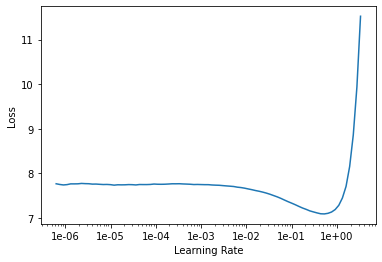

In [34]:
learn_lm.recorder.plot()

In [35]:
lr = 2e-2
lr *= bs/48

wd = 0.1

In [36]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,12.650836,7.238255,0.868331,0.131669,553.615356,00:33
1,5.107764,4.701796,0.638495,0.361505,45.696251,00:33


In [37]:
learn_lm.save(f'{lang}fine_tuned1_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.827243,3.514403,0.470117,0.529883,12.261751,00:44
1,3.150555,2.940914,0.379271,0.620729,6.667614,00:44
2,2.960787,2.807663,0.354726,0.645274,5.705032,00:44
3,3.000472,2.837949,0.356481,0.643519,5.743314,00:44
4,3.029747,2.850721,0.360221,0.639779,5.855797,00:44
5,2.989197,2.828092,0.357413,0.642587,5.703299,00:44
6,2.954739,2.790118,0.348961,0.651039,5.530514,00:44
7,2.901024,2.757504,0.342019,0.657981,5.162446,00:44
8,2.837116,2.712097,0.335814,0.664187,4.997771,00:44
9,2.794699,2.657774,0.324903,0.675096,4.786609,00:44


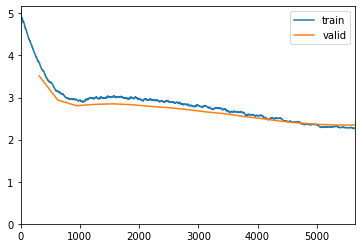

In [38]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [39]:
#learn_lm.save(f'{lang}fine_tuned2_lenerbr_sp15_multifit_v2')
#learn_lm.save_encoder(f'{lang}fine_tuned2_enc_lenerbr_sp15_multifit_v2')

Save best LM learner and its encoder

In [40]:
learn_lm.save(f'{lang}fine_tuned_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

## Fine-tuning "backward LM"

### Databunch

In [41]:
%%time
data_lm = (TextList.from_df(df_lm, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.2, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 2.14 s, sys: 182 ms, total: 2.32 s
Wall time: 3.85 s


In [42]:
data_lm.save(f'{path}/{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

### Training

In [43]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 153 ms, sys: 8.7 ms, total: 162 ms
Wall time: 175 ms


In [44]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [45]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3_bwd, drop_mult=1., 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 599 ms, sys: 121 ms, total: 719 ms
Wall time: 3.08 s


#### Change loss function

In [46]:
learn_lm.loss_func

FlattenedLoss of CrossEntropyLoss()

In [47]:
learn_lm.loss_func = FlattenedLoss(LabelSmoothingCrossEntropy)

In [48]:
learn_lm.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

#### Training

In [49]:
learn_lm.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


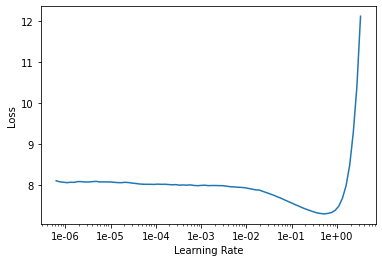

In [50]:
learn_lm.recorder.plot()

In [51]:
lr = 2e-2
lr *= bs/48

wd = 0.1

In [52]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,15.327642,7.279349,0.887908,0.112092,794.770874,00:34
1,5.769167,5.490209,0.764721,0.235279,118.467041,00:34


In [53]:
learn_lm.save(f'{lang}fine_tuned1_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,4.289517,3.894290,0.499173,0.500827,19.182375,00:44
1,3.303151,3.104027,0.384397,0.615603,7.972410,00:44
2,3.014955,2.865279,0.342218,0.657782,5.985470,00:44
3,3.007538,2.904049,0.346448,0.653552,6.135276,00:44
4,3.082971,2.897279,0.346387,0.653613,6.319256,00:44
5,3.039827,2.877209,0.341600,0.658400,6.075020,00:44
6,3.056098,2.849878,0.338555,0.661444,5.943229,00:44
7,2.968282,2.802492,0.329641,0.670359,5.534186,00:44
8,2.932220,2.776056,0.323878,0.676122,5.302593,00:44
9,2.825566,2.697786,0.312946,0.687054,5.035261,00:44


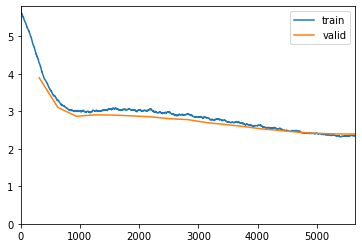

In [54]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [55]:
learn_lm.save(f'{lang}fine_tuned2_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned2_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

Save best LM learner and its encoder

In [56]:
learn_lm.save(f'{lang}fine_tuned_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

## Fine-tuning "forward Classifier"

### Dados para o classificador

In [260]:
data_path

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data')

In [261]:
path_data = data_path

# Load csv
df_model = pd.read_csv(path_data/'tcepi_decisoes_ate_10_2020.csv', sep=';')

df_trn_val = df_model[['ementa', 'assunto_agrupado']]

# columns names
reviews = "ementa"
label = "assunto_agrupado"

In [262]:
df_trn_val.shape

(652, 2)

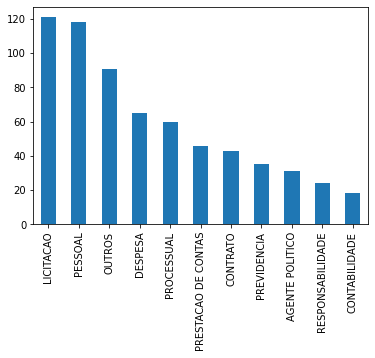

In [263]:
df_trn_val.assunto_agrupado.value_counts().plot(kind='bar')

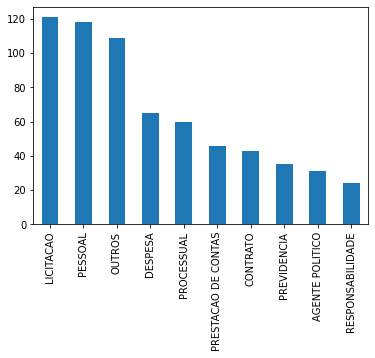

In [264]:
df_trn_val['assunto_agrupado'] = df_trn_val.assunto_agrupado.apply(lambda x: x if x != 'CONTABILIDADE' else 'OUTROS')
df_trn_val.assunto_agrupado.value_counts().plot(kind='bar')

### Databunch

In [265]:
bs = 18

In [266]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs)

CPU times: user 163 ms, sys: 27.5 ms, total: 190 ms
Wall time: 206 ms


In [267]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, vocab=data_lm.vocab, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.2, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1))

CPU times: user 237 ms, sys: 122 ms, total: 358 ms
Wall time: 710 ms


In [268]:
%%time
data_clas.save(f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

CPU times: user 22.4 ms, sys: 4.67 ms, total: 27 ms
Wall time: 33.2 ms


### Get weights to penalize loss function of the majority class

In [269]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 48.2 ms, sys: 1.04 ms, total: 49.2 ms
Wall time: 50.7 ms


In [270]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(522, 130, 652)

In [271]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([ 20,  33,  53, 102,  83, 101,  38,  27,  46,  19]),
 array([11, 10, 12, 19, 26, 17,  8,  8, 14,  5]))

In [272]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.9616858237547893,
  0.9367816091954023,
  0.8984674329501916,
  0.8045977011494253,
  0.8409961685823755,
  0.8065134099616859,
  0.9272030651340997,
  0.9482758620689655,
  0.9118773946360154,
  0.9636015325670498],
 [0.9153846153846154,
  0.9230769230769231,
  0.9076923076923077,
  0.8538461538461538,
  0.8,
  0.8692307692307693,
  0.9384615384615385,
  0.9384615384615385,
  0.8923076923076922,
  0.9615384615384616])

### Training (Loss = FlattenedLoss of weighted LabelSmoothingCrossEntropy)

In [273]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 50.2 ms, sys: 500 µs, total: 50.7 ms
Wall time: 53.1 ms


In [274]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [275]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, pretrained=False, drop_mult=0.3, 
                                  metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2');

#### Change loss function

In [276]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [277]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = FlattenedLoss(WeightedLabelSmoothingCrossEntropy, weight=loss_weights)

In [278]:
learn_c.loss_func

FlattenedLoss of WeightedLabelSmoothingCrossEntropy()

#### Training

In [279]:
learn_c.freeze()

In [280]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


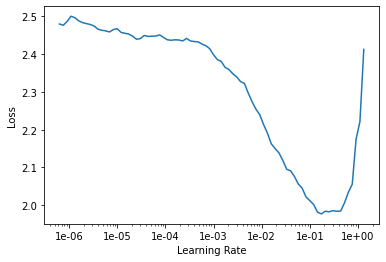

In [281]:
learn_c.recorder.plot()

In [282]:
lr = 2e-1
lr *= bs/48

wd = 0.1

In [283]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.980902,2.076439,0.269231,0.200977,00:01
1,1.607728,1.490963,0.569231,0.551931,00:01


In [284]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [285]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.530573,1.613941,0.592308,0.533206,00:01
1,1.373255,1.461380,0.553846,0.547331,00:01


In [286]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [287]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.485559,1.576056,0.561538,0.518898,00:01
1,1.268220,1.502607,0.576923,0.574176,00:01


In [288]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [289]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.967200,1.572999,0.615385,0.619544,00:02
1,0.884924,1.466356,0.615385,0.618388,00:02


In [290]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [291]:
learn_c.unfreeze()
learn_c.fit_one_cycle(4, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.687799,1.440843,0.576923,0.586471,00:03
1,0.658991,1.420726,0.630769,0.637369,00:03
2,0.623972,1.391206,0.646154,0.634861,00:03
3,0.602216,1.395896,0.653846,0.644757,00:03


3	0.593976	1.407004	0.615385	0.590921	00:03

In [292]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [293]:
#learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
#learn_c.fit_one_cycle(4, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

In [294]:
#learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [295]:
#learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
#learn_c.fit_one_cycle(2, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

In [296]:
#learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

### Confusion matrix

In [297]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1);

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config)

CPU times: user 500 ms, sys: 151 ms, total: 650 ms
Wall time: 1.1 s


In [298]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', purge=False);

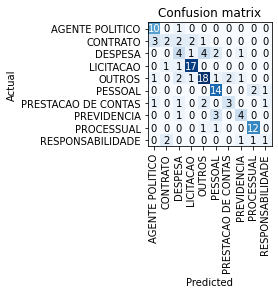

In [299]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [300]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
#print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]+cm[10,10])/(cm.sum())}')
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')
print(f'accuracy on class 4: {cm[4,4]/(cm.sum(1)[4])*100}')
print(f'accuracy on class 5: {cm[5,5]/(cm.sum(1)[5])*100}')
print(f'accuracy on class 6: {cm[6,6]/(cm.sum(1)[6])*100}')
print(f'accuracy on class 7: {cm[7,7]/(cm.sum(1)[7])*100}')
print(f'accuracy on class 8: {cm[8,8]/(cm.sum(1)[8])*100}')
print(f'accuracy on class 9: {cm[9,9]/(cm.sum(1)[9])*100}')
#print(f'accuracy on class 10: {cm[10,10]/(cm.sum(1)[10])*100}')

[[10  0  1  0 ...  0  0  0  0]
 [ 3  2  2  2 ...  0  0  0  0]
 [ 0  0  4  1 ...  0  1  0  0]
 [ 0  1  1 17 ...  0  0  0  0]
 ...
 [ 1  0  1  0 ...  3  0  0  1]
 [ 0  0  1  0 ...  0  4  0  0]
 [ 0  0  0  0 ...  0  0 12  0]
 [ 0  2  0  0 ...  0  1  1  1]]
accuracy global: 0.6538461538461539
accuracy on class 0: 90.9090909090909
accuracy on class 1: 20.0
accuracy on class 2: 33.33333333333333
accuracy on class 3: 89.47368421052632
accuracy on class 4: 69.23076923076923
accuracy on class 5: 82.35294117647058
accuracy on class 6: 37.5
accuracy on class 7: 50.0
accuracy on class 8: 85.71428571428571
accuracy on class 9: 20.0


In [301]:
learn_c.show_results()

text,target,prediction
▁xxbos ▁xxup ▁em bar gos ▁xxup ▁de ▁xxup ▁declaração . ▁xxup ▁proposta ▁xxup ▁de ▁xxup ▁elaboração ▁xxup ▁de ▁xxup ▁decisão ▁xxup ▁norma tiva . ▁xxup ▁pedido ▁xxup ▁de ▁xxup ▁uni form ização ▁xxup ▁de ▁xxup ▁ juri sp ru dência . ▁xxup ▁rea just e ▁xxup ▁dos ▁xxup ▁sub s ídio s ▁xxup ▁de ▁xxup ▁vereadores . ▁1 ▁ - ▁o ▁sub s ídio ▁dos ▁xxmaj ▁vereadores ▁não ▁pode ▁ser,AGENTE POLITICO,AGENTE POLITICO
"▁xxbos ▁xxup ▁conta s ▁xxup ▁de ▁xxup ▁governo . ▁xxup ▁prefeitura ▁xxup ▁municipal ▁xxup ▁de ▁xxup ▁ angi cal ▁xxup ▁do ▁xxup ▁piauí ▁xxup ▁exercício ▁2017. ▁1 ▁ - ▁xxmaj ▁receita ▁municipal , ▁observou - se ▁no ▁exercício ▁um ▁ dé fici t ▁na ▁xxmaj ▁receita ▁xxmaj ▁arre cada , ▁onde ▁a ▁mesma ▁representou ▁tão ▁somente ▁ 59 , 51 % ▁da ▁xxmaj ▁receita ▁xxmaj ▁prevista , ▁fato ▁esse ▁que",OUTROS,OUTROS
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁prefeitura ▁xxup ▁municipal ▁xxup ▁de ▁xxup ▁eles b ão ▁xxup ▁veloso . ▁xxup ▁conta s ▁xxup ▁de ▁xxup ▁gestão . ▁xxup ▁exercício ▁xxup ▁de ▁2017. ▁xxup ▁sub contra tação ▁xxup ▁total ▁xxup ▁de ▁xxup ▁contrato ▁xxup ▁de ▁xxup ▁serviços ▁xxup ▁de ▁xxup ▁transporte ▁xxup ▁escolar ▁xxup ▁sem ▁xxup ▁autorização ▁xxup ▁expressa ▁xxup ▁no ▁xxup ▁e di tal . ▁xxup,CONTRATO,CONTRATO
▁xxbos ▁xxup ▁in spe ção ▁xxup ▁na ▁xxup ▁prefeitura ▁xxup ▁municipal ▁xxup ▁de ▁xxup ▁palmeira is . ▁xxup ▁irregular idades ▁xxup ▁em ▁xxup ▁procedimento s ▁xxup ▁de ▁xxup ▁li cita ção ▁– ▁xxup ▁exercício ▁2016. ▁xxup ▁contratação ▁e ▁xxup ▁execução ▁xxup ▁de ▁xxup ▁despesas ▁xxup ▁por ▁xxup ▁empresa ▁xxup ▁fictícia . ▁xxup ▁consta tação ▁xxup ▁de ▁xxup ▁in ca pa cidade ▁xxup ▁operacional ▁xxup ▁necessária ▁a ▁xxup ▁para ▁xxup ▁realizar,CONTRATO,LICITACAO
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁governo . ▁xxup ▁im prop riedade ▁xxup ▁verifica da ▁xxup ▁na ▁xxup ▁análise ▁xxup ▁do ▁xxup ▁planejamento ▁xxup ▁ governa mental . ▁xxup ▁in temp es tividade ▁xxup ▁documentação . ▁xxup ▁balanço ▁xxup ▁geral ▁xxup ▁enviado ▁xxup ▁fora ▁xxup ▁do ▁xxup ▁prazo . ▁xxup ▁multa s ▁xxup ▁por ▁xxup ▁atraso ▁xxup ▁na ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta,OUTROS,OUTROS


### Predictions some random sentences

In [302]:
# Get the prediction
test_text = "A medida cautelar do TCE que determina a suspensão de licitação por falhas no edital não impede o órgão ou a entidade de rever seu ato convocatório, valendo-se do poder de autotutela (art. 49 da Lei 8.666/1993 c/c o art. 9º da Lei 10.520/2002) , com o objetivo de, antecipando-se a eventual deliberação do Tribunal, promover de modo próprio a anulação da licitação e o refazimento do edital, livre dos vícios apontados."
pred = learn_c.predict(test_text)
print(pred)

(Category tensor(3), tensor(3), tensor([0.0102, 0.0208, 0.0172, 0.7543, 0.0205, 0.0406, 0.0214, 0.0541, 0.0162,
        0.0447]))


In [303]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
txt_ci.show_intrinsic_attention(test_text,cmap=plt.cm.Purples)

In [304]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([1.0000, 0.5075, 0.3299, 0.0901, 0.2170, 0.1419, 0.0816, 0.0216, 0.0252,
        0.0313, 0.0666, 0.0652, 0.0792, 0.1579, 0.1238, 0.3260, 0.0924, 0.1858,
        0.0930, 0.0412, 0.0791, 0.1095, 0.0313, 0.0410, 0.0752, 0.1247, 0.1341,
        0.1482, 0.3414, 0.1165, 0.3596, 0.2047, 0.1671, 0.4562, 0.1659, 0.6085,
        0.2137, 0.1938, 0.3036, 0.0347, 0.0616, 0.1935, 0.0582, 0.0363, 0.0595,
        0.0749, 0.2568, 0.1420, 0.4707, 0.5023, 0.0943, 0.0795, 0.0650, 0.0673,
        0.0587, 0.1238, 0.2306, 0.0253, 0.0311, 0.0815, 0.1117, 0.0983, 0.1706,
        0.0566, 0.0488, 0.1164, 0.1052, 0.0570, 0.0702, 0.0416, 0.0288, 0.0499,
        0.0922, 0.0751, 0.0364, 0.0265, 0.0841, 0.1027, 0.0490, 0.1185, 0.0664,
        0.0841, 0.2647, 0.1964, 0.0611, 0.0865, 0.0352, 0.0824, 0.1583, 0.0442,
        0.1520, 0.2966, 0.0545, 0.0211, 0.0429, 0.0778, 0.1954, 0.1137, 0.4748,
        0.0225, 0.0145, 0.0650, 0.1042, 0.0644, 0.2261, 0.1822, 0.2558, 0.2299,
        0.1049, 0.2730, 0.1893, 0.0793, 

In [305]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
▁xxbos ▁xxup ▁pedido ▁xxup ▁de ▁xxup ▁re ex a me . ▁xxup ▁in spe ção . ▁xxup ▁de ver ▁xxup ▁de ▁xxup ▁promover ▁a ▁xxup ▁substituição ▁xxup ▁das ▁xxup ▁contra ta ções ▁xxup ▁pre c árias ▁e ▁xxup ▁direta s ▁xxup ▁de ▁xxup ▁pessoal ▁xxup ▁por ▁xxup ▁mão - de - o bra ▁xxup ▁regularmente ▁xxup ▁contratada ▁xxup ▁através ▁xxup ▁de ▁xxup ▁concurso ▁xxup ▁público . ▁xxup ▁de s cum,PESSOAL,DESPESA,4.52,0.01
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁de s cum pri mento ▁xxup ▁de ▁xxup ▁decisão ▁xxup ▁ ple n ária ▁xxup ▁desta ▁xxup ▁corte ▁xxup ▁de ▁xxup ▁conta s ▁xxup ▁( art . ▁3 o ▁e ▁xxup ▁art . ▁16 8 ▁xxup ▁da ▁xxup ▁lei ▁xxmaj ▁no ▁5 . 8 88 ▁/ ▁ 09 ▁xxup ▁da ▁xxup ▁lei ▁xxup ▁ n ° ▁5 . 88,AGENTE POLITICO,CONTRATO,4.02,0.02
▁xxbos ▁xxup ▁representação . ▁xxup ▁contratação ▁xxup ▁de ▁xxup ▁pessoal ▁xxup ▁sem ▁xxup ▁concurso ▁xxup ▁público . ▁xxup ▁não ▁xxup ▁re pas se ▁xxup ▁de ▁xxup ▁contribuições ▁xxup ▁pre vide nci árias ▁xxup ▁por ▁xxup ▁parte ▁xxup ▁da ▁xxup ▁prefeitura ▁xxup ▁municipal . ▁xxup ▁ausência ▁xxup ▁de ▁xxup ▁manifestação ▁xxup ▁do ▁xxup ▁gesto r . ▁xxmaj ▁conforme ▁análise ▁da ▁presta ção ▁de ▁conta s ▁do ▁xxmaj ▁município ▁do ▁exercício ▁2015,PESSOAL,PREVIDENCIA,3.79,0.02
"▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁sa gre s . ▁xxup ▁cálculo ▁xxup ▁dos ▁xxup ▁limites ▁xxup ▁cons titu cionais ▁e ▁xxup ▁legais . ▁xxmaj ▁os ▁dados ▁eletrônicos ▁deve rão ▁apresentar - se ▁em ▁inteira ▁conformidade ▁com ▁as ▁informações ▁dos ▁documentos ▁físico s ▁que ▁integra m ▁a ▁presta ção ▁de ▁conta s , ▁que ▁permanecer á ▁na ▁sede ▁dos ▁ juri s di cionado s",OUTROS,PRESTACAO DE CONTAS,3.70,0.02
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁gestão . ▁xxup ▁irregular idade ▁xxup ▁nas ▁xxup ▁despesas ▁xxup ▁realizadas ▁xxup ▁com ▁xxup ▁recursos ▁xxup ▁de ▁xxup ▁pre ca tório s ▁xxup ▁do ▁xxup ▁ fund ef . ▁xxup ▁pagamento ▁xxup ▁de ▁xxup ▁aposentadoria s ▁xxup ▁sem ▁xxup ▁fundo ▁xxup ▁de ▁xxup ▁pre vi dência ▁xxup ▁próprio . ▁xxup ▁in ad impl ência ▁xxup ▁com ▁a ▁xxup ▁eletro,AGENTE POLITICO,PRESTACAO DE CONTAS,3.68,0.03


## Fine-tuning "backward Classifier"

In [535]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

In [536]:
bs = 18

### Databunch

In [537]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 172 ms, sys: 40.5 ms, total: 212 ms
Wall time: 216 ms


In [538]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest), vocab=data_lm.vocab)
    .split_by_rand_pct(0.2, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 246 ms, sys: 127 ms, total: 373 ms
Wall time: 691 ms


In [539]:
%%time
data_clas.save(f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

CPU times: user 21.9 ms, sys: 4.98 ms, total: 26.9 ms
Wall time: 33.5 ms


### Get weights to penalize loss function of the majority class

In [540]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 48.5 ms, sys: 2.7 ms, total: 51.2 ms
Wall time: 52.6 ms


In [541]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(522, 130, 652)

In [542]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([ 20,  33,  53, 102,  83, 101,  38,  27,  46,  19]),
 array([11, 10, 12, 19, 26, 17,  8,  8, 14,  5]))

In [543]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.9616858237547893,
  0.9367816091954023,
  0.8984674329501916,
  0.8045977011494253,
  0.8409961685823755,
  0.8065134099616859,
  0.9272030651340997,
  0.9482758620689655,
  0.9118773946360154,
  0.9636015325670498],
 [0.9153846153846154,
  0.9230769230769231,
  0.9076923076923077,
  0.8538461538461538,
  0.8,
  0.8692307692307693,
  0.9384615384615385,
  0.9384615384615385,
  0.8923076923076922,
  0.9615384615384616])

### Training (Loss = FlattenedLoss of weighted LabelSmoothingCrossEntropy)

In [544]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 70 ms, sys: 7.39 ms, total: 77.4 ms
Wall time: 72 ms


In [545]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [546]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2');

#### Change loss function

In [547]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [548]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = FlattenedLoss(WeightedLabelSmoothingCrossEntropy, weight=loss_weights)

In [549]:
learn_c.loss_func

FlattenedLoss of WeightedLabelSmoothingCrossEntropy()

#### Training

In [550]:
learn_c.freeze()

In [551]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


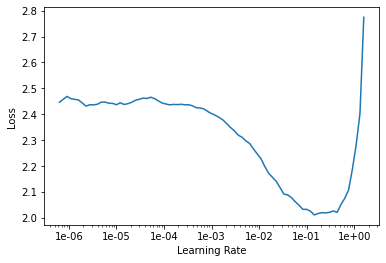

In [552]:
learn_c.recorder.plot()

In [553]:
lr = 2e-1
lr *= bs/48

wd = 0.1

In [554]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.980551,2.116007,0.200000,0.133986,00:01
1,1.635832,1.550101,0.515385,0.485504,00:01


In [555]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [556]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.547096,1.922768,0.461538,0.420720,00:01
1,1.400258,1.466465,0.600000,0.591070,00:01


In [557]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [558]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.491093,1.809468,0.476923,0.482860,00:01
1,1.320251,1.424515,0.600000,0.602243,00:01


In [559]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [560]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.995728,1.508180,0.576923,0.561405,00:02
1,0.891448,1.362417,0.661538,0.665161,00:02


In [561]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [562]:
learn_c.unfreeze()
learn_c.fit_one_cycle(4, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.680888,1.381245,0.615385,0.614214,00:03
1,0.662022,1.376971,0.615385,0.618816,00:03
2,0.626178,1.707052,0.638462,0.624718,00:03
3,0.601816,1.481596,0.646154,0.631874,00:03


In [563]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [564]:
learn_c.fit_one_cycle(4, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.581819,1.755459,0.630769,0.624585,00:03
1,0.577488,1.860412,0.638462,0.634805,00:03
2,0.575195,1.369300,0.630769,0.622047,00:03
3,0.575220,1.450656,0.607692,0.603895,00:03


In [565]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [566]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_c.fit_one_cycle(1, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.573600,1.369644,0.630769,0.618797,00:03


In [567]:
learn_c.fit_one_cycle(1, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.572716,1.377779,0.630769,0.620346,00:03


In [568]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_p15_multifit_bwd_v2')

In [569]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_p15_multifit_bwd_v2');
learn_c.to_fp32().export(f'{lang}_classifier_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

### Confusion matrix

In [570]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config)

CPU times: user 522 ms, sys: 141 ms, total: 664 ms
Wall time: 1.05 s


In [571]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_p15_multifit_bwd_v2', purge=False);

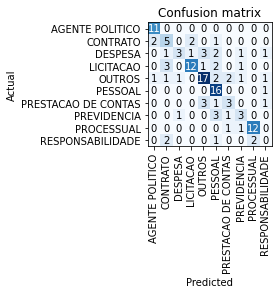

In [572]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [573]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
#print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]+cm[10,10])/(cm.sum())}')
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')
print(f'accuracy on class 4: {cm[4,4]/(cm.sum(1)[4])*100}')
print(f'accuracy on class 5: {cm[5,5]/(cm.sum(1)[5])*100}')
print(f'accuracy on class 6: {cm[6,6]/(cm.sum(1)[6])*100}')
print(f'accuracy on class 7: {cm[7,7]/(cm.sum(1)[7])*100}')
print(f'accuracy on class 8: {cm[8,8]/(cm.sum(1)[8])*100}')
print(f'accuracy on class 9: {cm[9,9]/(cm.sum(1)[9])*100}')
#print(f'accuracy on class 10: {cm[10,10]/(cm.sum(1)[10])*100}')

[[11  0  0  0 ...  0  0  0  0]
 [ 2  5  0  2 ...  0  0  0  0]
 [ 0  1  3  1 ...  0  1  0  1]
 [ 0  3  0 12 ...  0  1  0  0]
 ...
 [ 0  0  0  0 ...  3  0  0  1]
 [ 0  0  1  0 ...  1  3  0  0]
 [ 0  0  0  0 ...  1  1 12  0]
 [ 0  2  0  0 ...  0  0  2  0]]
accuracy global: 0.6307692307692307
accuracy on class 0: 100.0
accuracy on class 1: 50.0
accuracy on class 2: 25.0
accuracy on class 3: 63.1578947368421
accuracy on class 4: 65.38461538461539
accuracy on class 5: 94.11764705882352
accuracy on class 6: 37.5
accuracy on class 7: 37.5
accuracy on class 8: 85.71428571428571
accuracy on class 9: 0.0


In [574]:
learn_c.show_results()

text,target,prediction
". ▁extraordinária ▁legislativa ▁sessão ▁a ▁para ▁convocado ▁parlamentar ▁ao tória iza den ▁in ▁natureza ▁de ▁parcela ▁referida ▁da ▁pagamento ▁ao ação ved ▁ ▁expressa se - ▁estabeleceu ▁2006, ▁de , ▁50 ° . n ▁ c ▁e ▁xxup ▁pela , ▁federal ▁xxmaj ▁constituição ▁xxmaj ▁da 57 ▁ . ▁art ▁do o ▁7 § ▁ ▁ao ▁dada ▁redação ▁nova ▁a ▁com ▁xxmaj - ▁ ▁4 ▁redução ▁a jou ense ▁ ▁que",AGENTE POLITICO,AGENTE POLITICO
". ▁social ▁controle ▁e ▁pública ência par ▁trans ▁de ▁instrumento ▁importante ▁desse ▁positiva mente ria ita ▁major ▁avaliação ▁uma ▁demonstra ▁que ▁mas , ▁imediato paro ▁re ▁merece ▁que riedade prop ▁im , s tório fa tis sa ▁in ▁considerados ▁foram ▁itens ▁4 ▁apenas ▁2016, ▁/ 02 ▁ ▁no ce t ▁ ▁xxup tiva ▁norma ▁xxmaj ▁instrução ▁xxmaj ▁da ▁i ▁anexo ▁o ▁conforme dos ▁analisa ▁itens ▁os ▁todos ▁dentre , ência",OUTROS,OUTROS
"). ▁2018 ▁/ 2 93 ▁1. dão ór ac ▁( ▁2017 ▁/ 05 ▁ ▁no ▁preços ▁xxmaj ▁de ▁tomada ▁xxmaj ▁na s ▁falha ▁às ▁relação ▁em , nte ▁procede da ▁julga ▁foi da pensa ▁a ▁denúncia ▁a . ▁5 . ▁falha ▁a ▁parcialmente ando ▁san , ▁apresentada ▁foi ▁defesa ▁de ▁sede ▁em , ▁entretanto , ▁qual ▁a , ▁fiscalização ▁da ▁quando da ▁solicita l ▁documenta ção ▁comprova ▁na s ▁falha",CONTRATO,CONTRATO
"▁especial s ▁conta ▁de ▁tomada ▁de ▁processo ▁do ▁resultado ▁do ▁quando s ▁aplicada ▁melhores ▁serão ▁que , ▁jurídica ▁personalidade ▁da ção considera s ▁de ▁a ▁e ▁empresa ▁da ▁parte ▁por idade ne ido ▁in ▁de ▁declaração ▁a , ▁prefeito ▁ao ▁e ção cita ▁li ▁de ▁comissão ▁da ▁membros ▁ao ▁pública ▁administração ▁na ▁confiança ▁de ▁função ▁ou ▁comissão ▁em ▁cargo ▁de ▁exercício ▁o ▁para tação bili ina ▁ ▁a , ▁empresa",CONTRATO,CONTRATO
". nte flutua ▁ ▁xxmaj ▁dívida ▁xxmaj ▁da ▁demonstração ▁xxmaj ▁e iais mon patri ▁ ▁xxmaj ▁variações ▁xxmaj ▁das ▁demonstração ▁xxmaj ▁na ▁e al moni patri ▁ ▁xxmaj , ▁financeiro ▁xxmaj , o mentári ça r ▁o ▁xxmaj s ▁balanço ▁xxmaj ▁dos ▁análise ▁na s ência ist s ▁incon ▁xxmaj ; s ▁balanço ▁dos ▁resultado ▁do ção pura ▁a ▁na m ▁influencia ▁quais ▁as nais patro ▁ ções ▁obriga ▁das",OUTROS,OUTROS


### Predictions some random sentences

In [575]:
# Get the prediction
test_text = "A medida cautelar do TCE que determina a suspensão de licitação por falhas no edital não impede o órgão ou a entidade de rever seu ato convocatório, valendo-se do poder de autotutela (art. 49 da Lei 8.666/1993 c/c o art. 9º da Lei 10.520/2002) , com o objetivo de, antecipando-se a eventual deliberação do Tribunal, promover de modo próprio a anulação da licitação e o refazimento do edital, livre dos vícios apontados."
pred = learn_c.predict(test_text)
print(pred)

(Category tensor(3), tensor(3), tensor([0.0091, 0.0094, 0.0059, 0.7773, 0.0453, 0.0104, 0.0448, 0.0201, 0.0477,
        0.0299]))


In [576]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
txt_ci.show_intrinsic_attention(test_text,cmap=plt.cm.Purples)

In [577]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([0.0604, 0.0725, 0.1687, 0.0380, 0.0624, 0.0577, 0.0967, 0.3318, 0.0716,
        0.1169, 0.0526, 0.0394, 0.0461, 0.1572, 0.4235, 0.3011, 0.1078, 0.0540,
        0.0555, 0.0544, 0.0870, 0.0693, 0.1043, 0.2296, 0.0921, 0.0991, 0.3246,
        0.1866, 0.0636, 0.1507, 0.1008, 0.2551, 0.0749, 0.0367, 0.0863, 0.1828,
        0.1058, 0.1844, 0.0551, 0.0632, 0.0289, 0.0753, 0.1537, 0.0677, 0.1192,
        0.2986, 0.0503, 0.0472, 0.0627, 0.0792, 0.3154, 1.0000, 0.1079, 0.1787,
        0.0421, 0.0483, 0.0451, 0.0194, 0.0147, 0.0180, 0.0335, 0.0604, 0.0149,
        0.0328, 0.0574, 0.0810, 0.0318, 0.0749, 0.1459, 0.0435, 0.0870, 0.0763,
        0.0457, 0.0307, 0.0289, 0.0160, 0.0473, 0.1523, 0.0204, 0.0427, 0.0966,
        0.1089, 0.2580, 0.1483, 0.1337, 0.0873, 0.0628, 0.1055, 0.0323, 0.0532,
        0.0200, 0.0637, 0.1305, 0.0430, 0.1218, 0.2995, 0.1101, 0.1669, 0.4869,
        0.0707, 0.1777, 0.0443, 0.0577, 0.0858, 0.0886, 0.2283, 0.1029, 0.1470,
        0.1019, 0.1136, 0.0541, 0.0529, 

In [578]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
▁xxbos ▁xxup ▁não ▁xxup ▁pagamento ▁xxup ▁de ▁xxup ▁verba s ▁xxup ▁trabalhista s ▁e ▁xxup ▁pre vide nci árias . ▁xxup ▁servidor a ▁xxup ▁municipal . ▁xxup ▁ vin cula ção ▁a ▁xxup ▁empresa ▁xxup ▁ter ce ir izada . ▁xxup ▁competência ▁xxup ▁do ▁xxup ▁ministério ▁xxup ▁público ▁xxup ▁do ▁xxup ▁trabalho ▁e ▁xxup ▁da ▁xxup ▁justiça ▁xxup ▁do ▁xxup ▁trabalho . ▁xxmaj ▁os ▁xxmaj ▁tribunais ▁de ▁xxmaj ▁conta s,RESPONSABILIDADE,PESSOAL,4.99,0.01
"▁xxbos ▁xxup ▁de spe sa . ▁xxup ▁não ▁xxup ▁per tin ente ▁a ▁xxup ▁função ▁xxup ▁saúde . ▁xxmaj ▁no ▁toca nte ▁aos ▁serviços ▁con tá bei s , ▁tais ▁despesas ▁são ▁consideradas ▁administrativa s ▁que ▁não ▁estão ▁relacionadas ▁à ▁promoção , ▁proteção , ▁recuperação ▁e ▁reabilitação ▁da ▁saúde ▁( art . ▁7 o , ▁da ▁xxmaj ▁portaria ▁no ▁2. 0 47 ▁/ ▁ 02 ), ▁não ▁podendo , ▁portanto",OUTROS,DESPESA,4.88,0.01
"▁xxbos ▁xxup ▁tomada ▁xxup ▁de ▁xxup ▁conta s ▁xxup ▁especial . ▁xxup ▁de spe sa . ▁xxup ▁existência ▁xxup ▁de ▁xxup ▁da no ▁xxup ▁ao ▁xxup ▁e r ário ▁xxup ▁na ▁xxup ▁obra ▁xxup ▁da ▁xxup ▁construção ▁xxup ▁de ▁xxup ▁uma ▁xxup ▁passar ela ▁xxup ▁sobre ▁o ▁xxup ▁rio ▁xxup ▁can u dos ▁ - ▁xxup ▁pi go ita , ▁xxup ▁no ▁xxup ▁município ▁xxup ▁de ▁xxup ▁novo ▁xxup ▁santo",LICITACAO,DESPESA,4.52,0.01
▁xxbos ▁xxup ▁e menta : ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁li cita ção . ▁xxup ▁permissão . ▁xxup ▁o fen sa ▁à ▁xxup ▁lei ▁xxup ▁de ▁xxup ▁li cita ções . ▁xxup ▁regular idades ▁xxup ▁com ▁xxup ▁ res s alva s . ▁1. ▁xxmaj ▁per missões ▁outorga das ▁por ▁prazo ▁in determin ado ▁é ▁expressa mente ▁proibido ▁por ▁lei ▁de ▁acordo ▁com ▁o ▁art,LICITACAO,CONTRATO,4.21,0.01
▁xxbos ▁xxup ▁e menta . ▁xxup ▁contrato ▁xxup ▁administrativo . ▁xxup ▁fiscalização . ▁xxup ▁de ▁xxup ▁obras . ▁xxup ▁reforma ▁xxup ▁de ▁xxup ▁unidade ▁xxup ▁básica ▁xxup ▁de ▁xxup ▁saúde . ▁xxup ▁orçamento ▁xxup ▁de ▁xxup ▁re fer ên ncia ▁xxup ▁in completo . ▁xxup ▁pagamento ▁xxup ▁da ▁1 a ▁xxup ▁medição ▁xxup ▁sem ▁o ▁xxup ▁a tes te ▁xxup ▁do ▁xxup ▁responsável ▁xxup ▁pela ▁xxup ▁fiscalização ▁xxup ▁do ▁xxup,CONTRATO,LICITACAO,4.14,0.02


## Ensemble

In [579]:
bs = 18

In [580]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [581]:
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1)
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', purge=False);

In [582]:
preds,targs = learn_c.get_preds(ordered=True)
accuracy(preds,targs),f1(preds,targs)

(tensor(0.6538), tensor(0.6354))

In [583]:
data_clas_bwd = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)
learn_c_bwd = text_classifier_learner(data_clas_bwd, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c_bwd.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', purge=False);

In [584]:
preds_b,targs_b = learn_c_bwd.get_preds(ordered=True)
accuracy(preds_b,targs_b),f1(preds_b,targs_b)

(tensor(0.6077), tensor(0.5881))

In [585]:
preds_avg = (preds+preds_b)/2

In [586]:
accuracy(preds_avg,targs_b),f1(preds_avg,targs_b)

(tensor(0.6846), tensor(0.6621))

In [587]:
from sklearn.metrics import confusion_matrix

predictions = np.argmax(preds_avg, axis = 1)
cm = confusion_matrix(np.array(targs_b), np.array(predictions))
print(cm)

## acc
#print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]+cm[10,10])/(cm.sum())}')
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')
print(f'accuracy on class 4: {cm[4,4]/(cm.sum(1)[4])*100}')
print(f'accuracy on class 5: {cm[5,5]/(cm.sum(1)[5])*100}')
print(f'accuracy on class 6: {cm[6,6]/(cm.sum(1)[6])*100}')
print(f'accuracy on class 7: {cm[7,7]/(cm.sum(1)[7])*100}')
print(f'accuracy on class 8: {cm[8,8]/(cm.sum(1)[8])*100}')
print(f'accuracy on class 9: {cm[9,9]/(cm.sum(1)[9])*100}')
#print(f'accuracy on class 10: {cm[10,10]/(cm.sum(1)[10])*100}')

[[11  0  0  0 ...  0  0  0  0]
 [ 2  2  2  3 ...  0  0  0  0]
 [ 0  0  5  1 ...  0  1  0  0]
 [ 0  1  1 16 ...  0  1  0  0]
 ...
 [ 1  0  0  0 ...  3  0  0  1]
 [ 0  0  1  0 ...  0  4  0  0]
 [ 0  0  0  0 ...  0  0 13  0]
 [ 0  2  0  0 ...  0  1  1  0]]
accuracy global: 0.6846153846153846
accuracy on class 0: 100.0
accuracy on class 1: 20.0
accuracy on class 2: 41.66666666666667
accuracy on class 3: 84.21052631578947
accuracy on class 4: 73.07692307692307
accuracy on class 5: 94.11764705882352
accuracy on class 6: 37.5
accuracy on class 7: 50.0
accuracy on class 8: 92.85714285714286
accuracy on class 9: 0.0


In [588]:
cm

array([[11,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 2,  2,  2,  3, ...,  0,  0,  0,  0],
       [ 0,  0,  5,  1, ...,  0,  1,  0,  0],
       [ 0,  1,  1, 16, ...,  0,  1,  0,  0],
       ...,
       [ 1,  0,  0,  0, ...,  3,  0,  0,  1],
       [ 0,  0,  1,  0, ...,  0,  4,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0, 13,  0],
       [ 0,  2,  0,  0, ...,  0,  1,  1,  0]])

In [590]:
cm.shape

(10, 10)